In [1]:
# 通过下⾯的LeNet代码，可以看出⽤深度学习框架实现此类模型⾮常简单。我们只需要实例化⼀
# 个Sequential块并将需要的层连接在⼀起。
import torch
from torch import nn
from d2l import torch as d2l

In [2]:
import gc

In [2]:
# 定义模型
net = nn.Sequential(
    nn.Conv2d(1, 6, kernel_size=5, padding=2), nn.Sigmoid(),
    nn.AvgPool2d(kernel_size=2, stride=2),
    nn.Conv2d(6, 16, kernel_size=5), nn.Sigmoid(),
    nn.AvgPool2d(kernel_size=2, stride=2),
    nn.Flatten(),
    nn.Linear(16 * 5 * 5, 120), nn.Sigmoid(),  # 经过卷积和池化后，得到的图像尺寸为5*5
    nn.Linear(120, 84), nn.Sigmoid(),
    nn.Linear(84, 10))

In [3]:
X = torch.rand(size=(1, 1, 28, 28), dtype=torch.float32)
for layer in net:
    X = layer(X)
    print(layer.__class__.__name__, 'output shape: \t', X.shape)

Conv2d output shape: 	 torch.Size([1, 6, 28, 28])
Sigmoid output shape: 	 torch.Size([1, 6, 28, 28])
AvgPool2d output shape: 	 torch.Size([1, 6, 14, 14])
Conv2d output shape: 	 torch.Size([1, 16, 10, 10])
Sigmoid output shape: 	 torch.Size([1, 16, 10, 10])
AvgPool2d output shape: 	 torch.Size([1, 16, 5, 5])
Flatten output shape: 	 torch.Size([1, 400])
Linear output shape: 	 torch.Size([1, 120])
Sigmoid output shape: 	 torch.Size([1, 120])
Linear output shape: 	 torch.Size([1, 84])
Sigmoid output shape: 	 torch.Size([1, 84])
Linear output shape: 	 torch.Size([1, 10])


In [5]:
torch.cuda.memory_allocated()/1e9

0.0

In [4]:
# 现在我们已经实现了LeNet，让我们看看LeNet在Fashion-MNIST数据集上的表现。
batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size=batch_size)

In [23]:
del net
gc.collect()

649

In [5]:
device = d2l.try_gpu()

In [6]:
device

device(type='cuda', index=0)

In [7]:
net.to(device)

Sequential(
  (0): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (1): Sigmoid()
  (2): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (4): Sigmoid()
  (5): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (6): Flatten(start_dim=1, end_dim=-1)
  (7): Linear(in_features=400, out_features=120, bias=True)
  (8): Sigmoid()
  (9): Linear(in_features=120, out_features=84, bias=True)
  (10): Sigmoid()
  (11): Linear(in_features=84, out_features=10, bias=True)
)

In [8]:
d2l.load_data_fashion_mnist??

In [11]:
X = torch.rand(size=(256, 1, 28, 28), dtype=torch.float32)
X = X.to(device)

In [13]:
y_hat = net(X)

In [14]:
print(y_hat.device)

cuda:0


In [11]:
import traceback

In [8]:
# 在GPU上运行
try:
    for i, (X, y) in enumerate(train_iter):
        X, y = X.to(device), y.to(device)
        y_hat = net(X)
        print('i:%d' % i, y_hat.device, X.shape)
except Exception as e:
    traceback.print_exc()

i:0 cuda:0 torch.Size([256, 1, 28, 28])
i:1 cuda:0 torch.Size([256, 1, 28, 28])
i:2 cuda:0 torch.Size([256, 1, 28, 28])
i:3 cuda:0 torch.Size([256, 1, 28, 28])
i:4 cuda:0 torch.Size([256, 1, 28, 28])
i:5 cuda:0 torch.Size([256, 1, 28, 28])
i:6 cuda:0 torch.Size([256, 1, 28, 28])
i:7 cuda:0 torch.Size([256, 1, 28, 28])
i:8 cuda:0 torch.Size([256, 1, 28, 28])
i:9 cuda:0 torch.Size([256, 1, 28, 28])
i:10 cuda:0 torch.Size([256, 1, 28, 28])
i:11 cuda:0 torch.Size([256, 1, 28, 28])
i:12 cuda:0 torch.Size([256, 1, 28, 28])
i:13 cuda:0 torch.Size([256, 1, 28, 28])
i:14 cuda:0 torch.Size([256, 1, 28, 28])
i:15 cuda:0 torch.Size([256, 1, 28, 28])
i:16 cuda:0 torch.Size([256, 1, 28, 28])
i:17 cuda:0 torch.Size([256, 1, 28, 28])
i:18 cuda:0 torch.Size([256, 1, 28, 28])
i:19 cuda:0 torch.Size([256, 1, 28, 28])
i:20 cuda:0 torch.Size([256, 1, 28, 28])
i:21 cuda:0 torch.Size([256, 1, 28, 28])
i:22 cuda:0 torch.Size([256, 1, 28, 28])
i:23 cuda:0 torch.Size([256, 1, 28, 28])
i:24 cuda:0 torch.Size([25

i:200 cuda:0 torch.Size([256, 1, 28, 28])
i:201 cuda:0 torch.Size([256, 1, 28, 28])
i:202 cuda:0 torch.Size([256, 1, 28, 28])
i:203 cuda:0 torch.Size([256, 1, 28, 28])
i:204 cuda:0 torch.Size([256, 1, 28, 28])
i:205 cuda:0 torch.Size([256, 1, 28, 28])
i:206 cuda:0 torch.Size([256, 1, 28, 28])
i:207 cuda:0 torch.Size([256, 1, 28, 28])
i:208 cuda:0 torch.Size([256, 1, 28, 28])
i:209 cuda:0 torch.Size([256, 1, 28, 28])
i:210 cuda:0 torch.Size([256, 1, 28, 28])
i:211 cuda:0 torch.Size([256, 1, 28, 28])
i:212 cuda:0 torch.Size([256, 1, 28, 28])
i:213 cuda:0 torch.Size([256, 1, 28, 28])
i:214 cuda:0 torch.Size([256, 1, 28, 28])
i:215 cuda:0 torch.Size([256, 1, 28, 28])
i:216 cuda:0 torch.Size([256, 1, 28, 28])
i:217 cuda:0 torch.Size([256, 1, 28, 28])
i:218 cuda:0 torch.Size([256, 1, 28, 28])
i:219 cuda:0 torch.Size([256, 1, 28, 28])
i:220 cuda:0 torch.Size([256, 1, 28, 28])
i:221 cuda:0 torch.Size([256, 1, 28, 28])
i:222 cuda:0 torch.Size([256, 1, 28, 28])
i:223 cuda:0 torch.Size([256, 1, 2

In [8]:
# 在CPU上运行
for i, (X, y) in enumerate(train_iter):
    y_hat = net(X)
    print('i:%d' % i, y_hat.device, X.shape)

i:0 cpu torch.Size([256, 1, 28, 28])
i:1 cpu torch.Size([256, 1, 28, 28])
i:2 cpu torch.Size([256, 1, 28, 28])
i:3 cpu torch.Size([256, 1, 28, 28])
i:4 cpu torch.Size([256, 1, 28, 28])
i:5 cpu torch.Size([256, 1, 28, 28])
i:6 cpu torch.Size([256, 1, 28, 28])
i:7 cpu torch.Size([256, 1, 28, 28])
i:8 cpu torch.Size([256, 1, 28, 28])
i:9 cpu torch.Size([256, 1, 28, 28])
i:10 cpu torch.Size([256, 1, 28, 28])
i:11 cpu torch.Size([256, 1, 28, 28])
i:12 cpu torch.Size([256, 1, 28, 28])
i:13 cpu torch.Size([256, 1, 28, 28])
i:14 cpu torch.Size([256, 1, 28, 28])
i:15 cpu torch.Size([256, 1, 28, 28])
i:16 cpu torch.Size([256, 1, 28, 28])
i:17 cpu torch.Size([256, 1, 28, 28])
i:18 cpu torch.Size([256, 1, 28, 28])
i:19 cpu torch.Size([256, 1, 28, 28])
i:20 cpu torch.Size([256, 1, 28, 28])
i:21 cpu torch.Size([256, 1, 28, 28])
i:22 cpu torch.Size([256, 1, 28, 28])
i:23 cpu torch.Size([256, 1, 28, 28])
i:24 cpu torch.Size([256, 1, 28, 28])
i:25 cpu torch.Size([256, 1, 28, 28])
i:26 cpu torch.Size([2

i:229 cpu torch.Size([256, 1, 28, 28])
i:230 cpu torch.Size([256, 1, 28, 28])
i:231 cpu torch.Size([256, 1, 28, 28])
i:232 cpu torch.Size([256, 1, 28, 28])
i:233 cpu torch.Size([256, 1, 28, 28])
i:234 cpu torch.Size([96, 1, 28, 28])


In [6]:
# d2l.evaluate_accuracy_gpu
def evaluate_accuracy_gpu(net, data_iter, device=None):
    """使用GPU计算模型在数据集上的精度"""
    if isinstance(net, nn.Module):
        net.eval() # 设置为评估模式
        if not device:
            device = next(iter(net.parameters())).device
    # 正确预测的数量，总预测的数量
    metric = d2l.Accumulator(2)
    with torch.no_grad():
        for X, y in data_iter:
            if isinstance(X, list):
                # BERT微调所需的（之后将介绍）
                X = [x.to(device) for x in X]
            else:
                X = X.to(device)
            y = y.to(device)
            metric.add(d2l.accuracy(net(X), y), y.numel())
    return metric[0] / metric[1]

In [7]:
# d2l.train_ch6
def train_ch6(net, train_iter, test_iter, num_epochs, lr, device):
    """用GPU训练模型"""
    def init_weights(m):
        if type(m) == nn.Linear or type(m) == nn.Conv2d:
            nn.init.xavier_uniform_(m.weight)
    net.apply(init_weights)
    print('training on', device)
    net.to(device)
    optimizer = torch.optim.SGD(net.parameters(), lr=lr)
    loss = nn.CrossEntropyLoss()
    animator = d2l.Animator(xlabel='epoch', xlim=[1, num_epochs],
                            legend=['train loss', 'train acc', 'test acc'])
    timer, num_batches = d2l.Timer(), len(train_iter)
    for epoch in range(num_epochs):
        # 训练损失之和，训练准确率之和，样本数
        metric = d2l.Accumulator(3)
        net.train()
        for i, (X, y) in enumerate(train_iter):
            timer.start()
            optimizer.zero_grad()
            X, y = X.to(device), y.to(device)
            y_hat = net(X)
            l = loss(y_hat, y)
            l.backward()
            optimizer.step()
            with torch.no_grad():
                metric.add(l * X.shape[0], d2l.accuracy(y_hat, y), X.shape[0])
            timer.stop()
            train_l = metric[0] / metric[2]
            train_acc = metric[1] / metric[2]
            if (i + 1) % (num_batches // 5) == 0 or i == num_batches - 1:
                animator.add(epoch + (i + 1) / num_batches,
                             (train_l, train_acc, None))
        test_acc = evaluate_accuracy_gpu(net, test_iter)
        animator.add(epoch + 1, (None, None, test_acc))
    print(f'loss {train_l:.3f}, train acc {train_acc:.3f}, '
          f'test acc {test_acc:.3f}')
    print(f'{metric[2] * num_epochs / timer.sum():.1f} examples/sec'
          f'on {str(device)}')

In [ ]:
lr, num_epochs = 0.9, 10
d2l.train_ch6(net, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())

training on cuda:0


In [1]:
import torch
from torch import nn
from d2l import torch as d2l


# 定义模型
net = nn.Sequential(
    nn.Conv2d(1, 6, kernel_size=5, padding=2), nn.Sigmoid(),
    nn.AvgPool2d(kernel_size=2, stride=2),
    nn.Conv2d(6, 16, kernel_size=5), nn.Sigmoid(),
    nn.AvgPool2d(kernel_size=2, stride=2),
    nn.Flatten(),
    nn.Linear(16 * 5 * 5, 120), nn.Sigmoid(),  # 经过卷积和池化后，得到的图像尺寸为5*5
    nn.Linear(120, 84), nn.Sigmoid(),
    nn.Linear(84, 10))

loss 0.479, train acc 0.819, test acc 0.786
11264.2 examples/sec on cpu
CPU times: total: 7min 8s
Wall time: 1min 41s


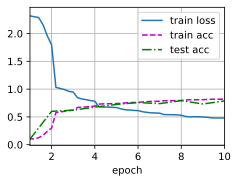

In [2]:
%%time
# 现在我们已经实现了LeNet，让我们看看LeNet在Fashion-MNIST数据集上的表现。
batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size=batch_size)


lr, num_epochs = 0.9, 10
d2l.train_ch6(net, train_iter, test_iter, num_epochs, lr, 'cpu')

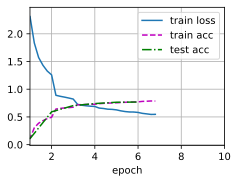

In [ ]:
%%time
# 现在我们已经实现了LeNet，让我们看看LeNet在Fashion-MNIST数据集上的表现。
batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size=batch_size)


lr, num_epochs = 0.9, 10
d2l.train_ch6(net, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())